In [127]:
import swan_vis as swan
import scanpy as sc
import seaborn as sns
import numpy as np


In [128]:
sc.__version__

'1.9.3'

## transcript-level

In [138]:
def do_de(adata):
    # adata.X = adata.layers['tpm'] # try logging counts not tpm
    adata.X = adata.layers['counts']
    sc.pp.log1p(adata)
    adata.layers['log_norm'] = adata.X.copy()
    sc.tl.rank_genes_groups(adata, 'genotype', layer='log_norm', method='wilcoxon')
    
    temp = sc.get.rank_genes_groups_df(adata, '5xfad')
    temp['sig'] = -1*np.log10(temp.pvals_adj)
    sns.scatterplot(temp, x='logfoldchanges', y='sig')
    
    return temp

In [139]:
sg = swan.read('swan_modelad.p')

Read in graph from swan_modelad.p


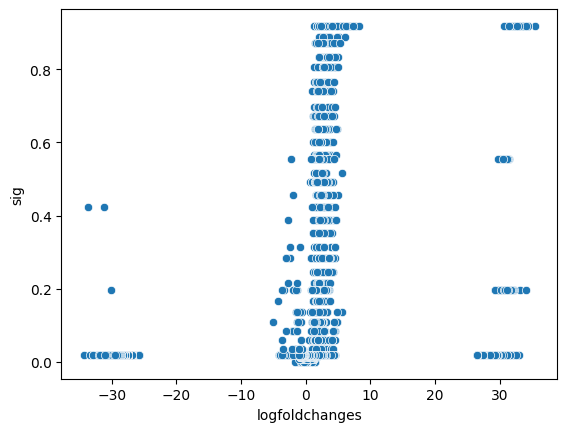

In [140]:
temp = do_de(sg.adata)

22389


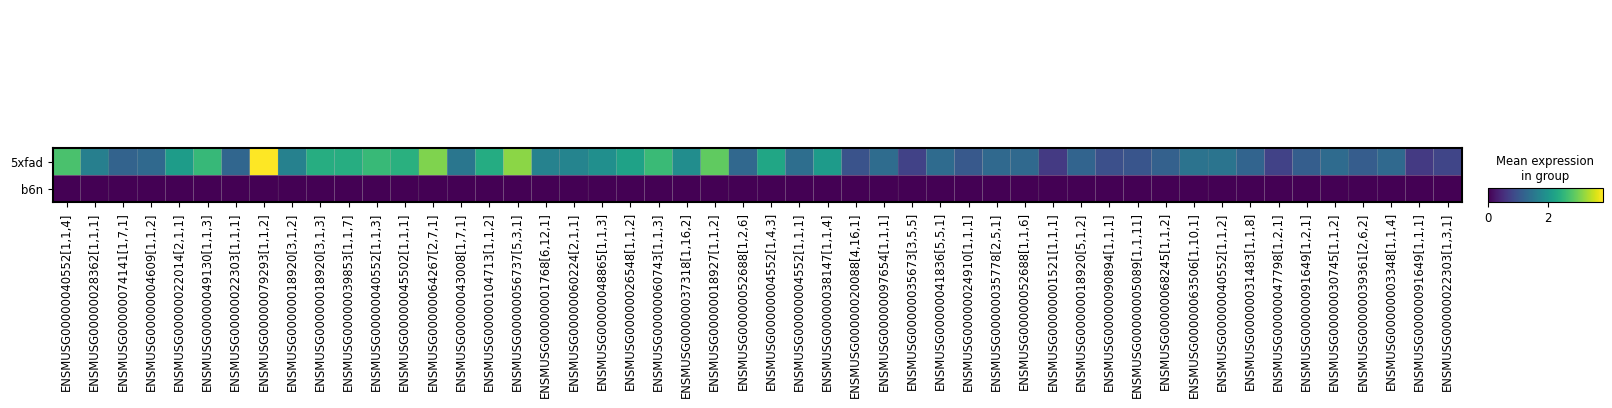

In [141]:
some_genes = temp.loc[temp.logfoldchanges.abs()>25, 'names']
print(len(some_genes))
some_genes = some_genes[:50]
sc.pl.matrixplot(sg.adata, some_genes, groupby='genotype', layer='log_norm')

## gene

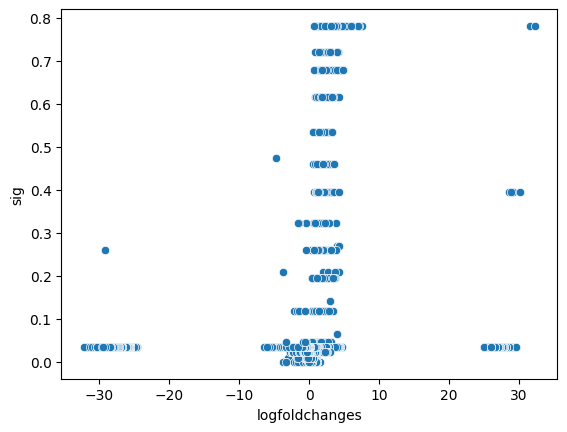

In [120]:
temp = do_de(sg.gene_adata)

In [121]:
sg.gene_adata.var.head()

,gid,n_cells
gid,,
1,1,3
3,3,20
5,5,4
6,6,2
8,8,13


In [123]:
sg.t_df.novelty.unique()

array(['Undefined', 'Known', 'NNC', 'ISM', 'NIC'], dtype=object)

In [113]:
temp

,names,scores,logfoldchanges,pvals,pvals_adj,sig
0,31017,3.703280,1.382464,0.000213,0.165378,0.781522
1,18778,3.703280,1.514346,0.000213,0.165378,0.781522
2,32747,3.703280,2.481243,0.000213,0.165378,0.781522
3,13298,3.703280,1.476149,0.000213,0.165378,0.781522
4,47034,3.703280,2.420408,0.000213,0.165378,0.781522
...,...,...,...,...,...,...
121991,31936,-3.086067,-29.213850,0.002028,0.549858,0.259749
121992,4809,-3.163219,-0.462454,0.001560,0.475891,0.322492
121993,101355,-3.163219,-1.418040,0.001560,0.475891,0.322492
121994,1013,-3.163219,-1.584289,0.001560,0.475891,0.322492


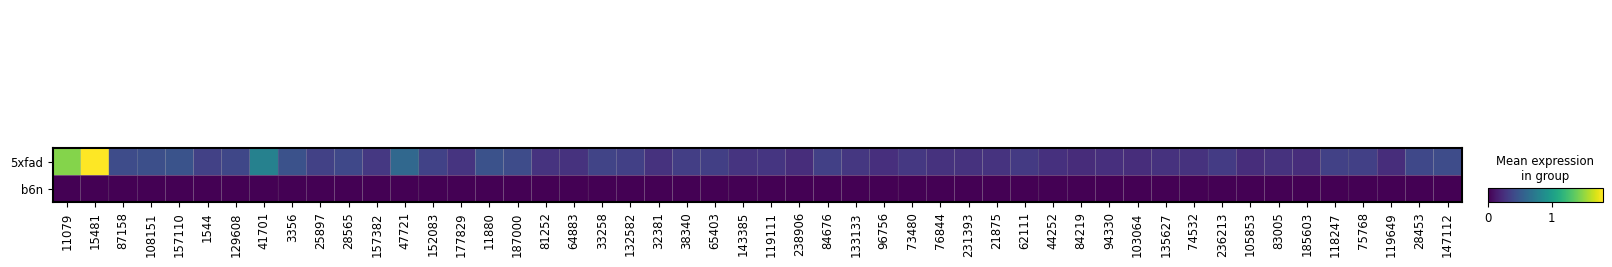

In [112]:
some_genes = temp.loc[temp.logfoldchanges.abs()>25, 'names']
some_genes = some_genes[:50]
sc.pl.matrixplot(sg.gene_adata, some_genes, groupby='genotype', layer='log_norm')

In [77]:
# print(sg.adata.layers['counts'][:5,:5].todense())
# print(sg.adata.layers['tpm'][:5,:5].todense())
sg.adata.X = sg.adata.layers['tpm']
# print(sg.adata.X[:5,:5].todense())
sc.pp.log1p(sg.adata)
# print(sg.adata.X[:5,:5].todense())
sg.adata.layers['log_norm'] = sg.adata.X.copy()
sc.tl.rank_genes_groups(sg.adata, 'genotype', layer='log_norm', )

In [21]:
sg.adata.layers

Layers with keys: counts, tpm, pi, log_norm

In [22]:
len(sg.adata.var.index)

103153

In [78]:
uwu = sc.get.rank_genes_groups_df(sg.adata, '5xfad')
uwu.loc[uwu.logfoldchanges.abs()>1]

,names,scores,logfoldchanges,pvals,pvals_adj
0,"ENSMUSG00000079293[1,1,2]",44.804638,34.617672,7.207939e-10,0.000016
1,"ENSMUSG00000022014[2,1,1]",20.721029,31.949549,1.531236e-07,0.000323
2,"ENSMUSG00000068129[1,1,1]",17.713697,7.645308,1.165854e-09,0.000016
3,"ENSMUSG00000018920[3,1,3]",17.378595,32.413639,5.136965e-07,0.000800
4,"ENSMUSG00000026285[1,1,1]",16.640266,5.978072,2.130925e-10,0.000013
...,...,...,...,...,...
103148,"ENSMUSG00000096753[2,2,2]",-4.721857,-5.255348,4.559438e-04,0.104748
103149,"ENSMUSG00000002012[2,1,1]",-4.736768,-3.698016,1.839815e-04,0.055492
103150,"ENSMUSG00000033565[3,7,1]",-5.079069,-2.177238,9.322605e-05,0.035097
103151,"ENSMUSG00000032526[1,1,3]",-6.021578,-30.820076,8.654035e-05,0.033434


In [79]:
uwu.loc[uwu.pvals_adj ==0]

,names,scores,logfoldchanges,pvals,pvals_adj


<AxesSubplot:xlabel='logfoldchanges', ylabel='uwu'>

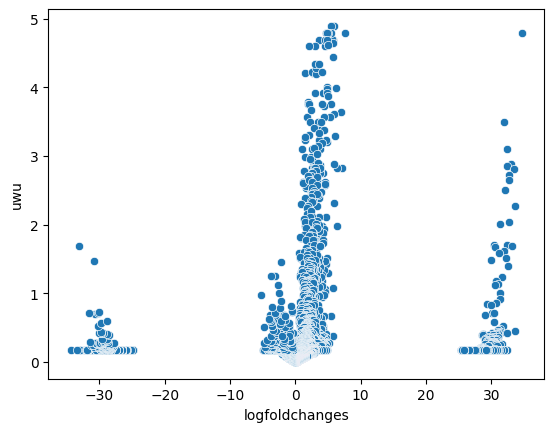

In [80]:
import numpy as np
uwu['uwu'] = -1*np.log10(uwu.pvals_adj)
# -1*np.log10(uwu.pvals_adj)
sns.scatterplot(uwu, x='logfoldchanges', y='uwu')

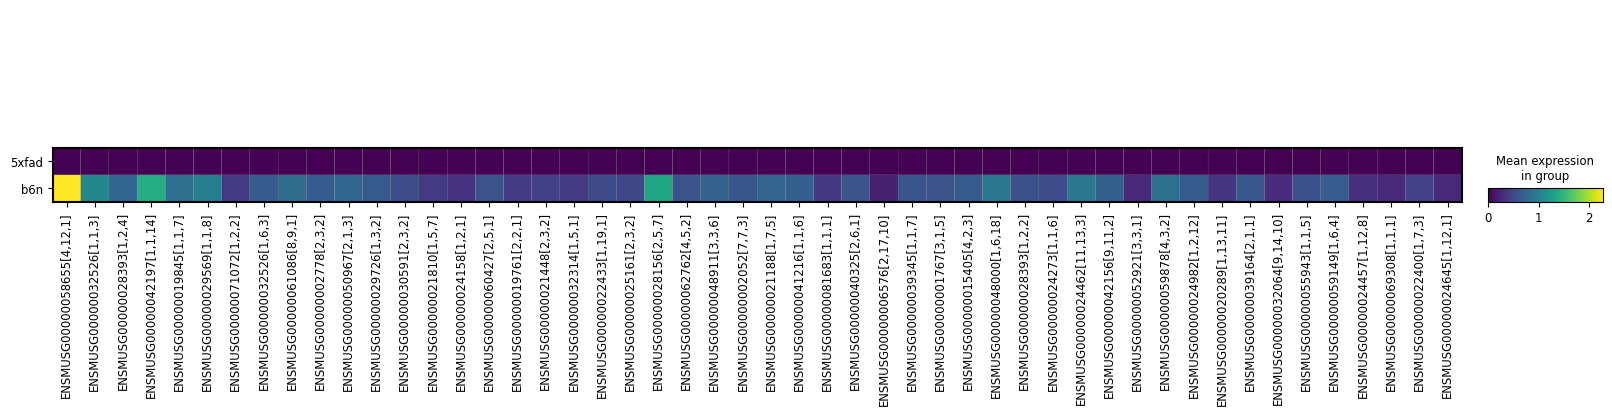

In [83]:
df = sc.get.rank_genes_groups_df(sg.adata, 'b6n')
some_genes = df.loc[df.logfoldchanges.abs()>25, 'names']
len(some_genes)
some_genes = some_genes[:50]
sc.pl.matrixplot(sg.adata, some_genes, groupby='genotype', layer='log_norm')
